# Naruto Classifier

Import all the packages

In [39]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import models
import numpy as np
import cv2
from tensorflow.keras.preprocessing import*
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data preprocessing using Image data generaotr

In [40]:
train_datagen = ImageDataGenerator(1/255)
test_datagen = ImageDataGenerator(1/255)

In [41]:
train_data = train_datagen.flow_from_directory('D:\\Naruto_data\\Data\\train',
                                          target_size = (180,180),
                                          batch_size = 8,
                                              # color_mode = 'grayscale',
                                          class_mode = 'categorical',shuffle =True
                                          )


Found 605 images belonging to 4 classes.


In [42]:
test_data = test_datagen.flow_from_directory('D:\\Naruto_data\\Data\\test',
                                          target_size = (180,180),
                                             #color_mode = 'grayscale',
                                          batch_size = 3,
                                          class_mode = 'categorical',shuffle = True
                                            )

Found 180 images belonging to 4 classes.


In [43]:
train_data.class_indices

{'Kakashi': 0, 'Naruto': 1, 'Sakura': 2, 'Sasuke': 3}

CNN Architecture

In [44]:
model = models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (180,180,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(4,activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)       

In [45]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

m_history = model.fit(train_data,epochs = 10,
                        validation_data = test_data,
                        verbose = 1)

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
76/76 [==============================] - 11s 139ms/step - loss: 2.6350 - accuracy: 0.5256 - val_loss: 0.6905 - val_accuracy: 0.6944
Epoch 2/10
76/76 [==============================] - 10s 136ms/step - loss: 0.6245 - accuracy: 0.7603 - val_loss: 0.9288 - val_accuracy: 0.6056
Epoch 3/10
76/76 [==============================] - 11s 148ms/step - loss: 0.3949 - accuracy: 0.8579 - val_loss: 0.6380 - val_accuracy: 0.7556
Epoch 4/10
76/76 [==============================] - 12s 153ms/step - loss: 0.3734 - accuracy: 0.8661 - val_loss: 0.4547 - val_accuracy: 0.8333
Epoch 5/10
76/76 [==============================] - 11s 150ms/step - loss: 0.2583 - accuracy: 0.9124 - val_loss: 0.5026 - val_accuracy: 0.8333
Epoch 6/10
76/76 [==============================] - 12s 153ms/step - loss: 0.2515 - accuracy: 0.9190 - val_loss: 0.5190 - val_accuracy: 0.8056
Epoch 7/10
76/76 [==============================] - 11s 150ms/step - loss: 0.1919 - accuracy: 0.9339 - val_loss: 0.4079 - val_accuracy: 0.8722

In [107]:
#model.save("D:\\DL_models\\Naruto_mul")

INFO:tensorflow:Assets written to: D:\DL_models\Naruto_mul\assets


In [2]:
model = keras.models.load_model('D:\\DL_models\\Naruto_mul')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 18, 18, 64)      

Performance analysis 

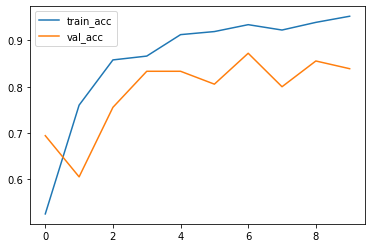

In [46]:
plt.plot(m_history.history['accuracy'],label = 'train_acc')
plt.plot(m_history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()

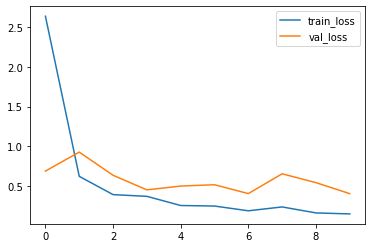

In [47]:
plt.plot(m_history.history['loss'],label = 'train_loss')
plt.plot(m_history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [55]:
y_test = [1,1,1,2,1,2,2,1,1,1, 1,0,0,0,0,0,0,0,0,0, 3,3,3,3,3,0,1,1,2,1, 3,3,3,3,3, 1,1,3,0,3, 2,3,2,1,3,3,2,1,2,0]
y_pred=[]
for i in range(50):
    
    test_image = image.load_img('D:\\test__\\test'+str(i)+".jpg", target_size = (180, 180))
  
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    y_pred.append(np.argmax(result))
    
print("test labels:",y_test)
print("predictions:",y_pred)

test labels: [1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2, 3, 2, 1, 3, 3, 2, 1, 2, 0]
predictions: [1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2, 1, 2, 1, 3, 3, 2, 1, 2, 0]


Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)


[[11  0  0  1]
 [ 0 13  1  1]
 [ 1  0  6  1]
 [ 1  1  0 13]]


Test accuracy 

In [59]:
from sklearn.metrics import accuracy_score
asc = accuracy_score(y_test,y_pred)
asc

0.86

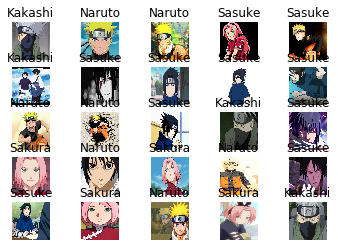

In [52]:
path = 'D:\\test__'
c = {0:'Kakashi',1:'Naruto',2:'Sakura',3:'Sasuke'}
m=0
for i in range(25,50):
    m+=1
    test_image = image.load_img('D:\\test__\\test'+str(i)+".jpg", target_size = (180, 180))
    plt.subplot(5,5,m)
    plt.imshow(test_image)
    plt.axis("off")
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    plt.title(c[np.argmax(result)])